# Hyperparameter Tuning🔧 in Lasso➰ and Ridge⛰️ Regressions

As you go along you'll learn to tune `alpha`, the hyperparameter of the lasso➰, and ridge⛰️ regression so that we can find the nice trade-off between bias and variance and get the best score.

About `GridSearchCV` and `RandomSearchCV` function, which does all the steps of hyperparameter tuning for us. And also about `Pipeline` that let us chain together multiple operators.

The first thing we need to do is to import some relevant libraries.

## Import Libraries 📦


In [28]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

## Import Dataset 📄

We'll be using Boston House Prices Dataset.

In [29]:
# Note we are loading a slightly different ("cleaned") pickle file
boston = pickle.load(open('../datasets/boston_housing_clean.pickle', "rb" ))
data = boston['dataframe']
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


## Extract Feature and Target Data 🤌

In [30]:
#Separating X and y Variables
X = data.drop('MEDV', axis=1)
y = data.MEDV

In [31]:
#Initiating KFold Object
from sklearn.model_selection import KFold
kf = KFold(shuffle=True, random_state=72018, n_splits=3)

## Lasso Regression ➰

We'll tune the `alpha` hyperparameter for Lasso regression.

First, we're going to generate an exponentially spaces range of alpha values using the NumPy `geomspace` function. And we are going to see which one of our different alpha values is going to lead to the highest score for our holdout set.

> 💡 Whenever you're doing lasso or ridge regression, always have to scale your data, otherwise, the model will not work optimally.

##### Generate a list of `alphas` for hyperparameter tuning:

In [32]:
alphas = np.geomspace(1e-9, 1e0, num=10)
print(alphas)

[1.e-09 1.e-08 1.e-07 1.e-06 1.e-05 1.e-04 1.e-03 1.e-02 1.e-01 1.e+00]


##### Create an instance of `PolynomialFeatures` and `StandardScaler`
As we are going to add polynomial features and also scale our data. Doing so will increase the complexity of the model and then we can apply regularization so that we can find the nice trade-off between bias and variance and get the best score.

In [33]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
SS = StandardScaler()
PF = PolynomialFeatures(degree=3)

##### Let's fit lasso regression for different `alpha` values and see which one of our `alpha` value lead to the highest score for our holdout set.

In [34]:
# import the class containing lass
from sklearn.linear_model import Lasso

We'll also import the class containing `Pipeline` that let us chain together multiple operators on our data that both have a `fit` method.

A pipeline contains a series of steps, where a step is ("name of step", actual_model). The "name of step" string is only used to help you identify which step you are on, and to allow you to specify parameters at that step.

In [35]:
from sklearn.pipeline import Pipeline

In [36]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import r2_score

scores = []
for alpha in alphas:
    las = Lasso(alpha=alpha, max_iter=10000)

    estimator = Pipeline([
        ("make_higher_degree", PF), # increases model complexity
        ("scaler", SS), # scaling
        ("lasso_regression", las),  # applying regularization
    ])

    predictions = cross_val_predict(estimator, X, y, cv = kf)
    score = r2_score(y, predictions)
    scores.append(score)

In [37]:
list(zip(alphas,scores))

[(1e-09, 0.4121422683020509),
 (1e-08, 0.4121650350032843),
 (1e-07, 0.4123925099773915),
 (1e-06, 0.41465558882945774),
 (1e-05, 0.4339430589672577),
 (0.0001, 0.5324110399207135),
 (0.001, 0.7462275421476046),
 (0.01, 0.8590823497516458),
 (0.1, 0.8280423631185617),
 (1.0, 0.7328688516176427)]

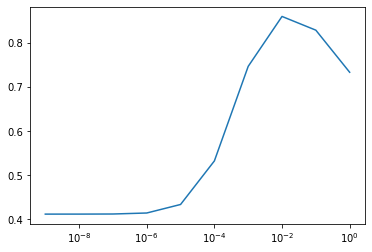

In [38]:
plt.semilogx(alphas, scores)

Here, `alpha` = 1e-09 is the most complex of the models.

And, `alpha` = 1.0 is the least complex.

So, looking at this graph we can say that at this `alpha` = 0.01 we get our optimal value in regards to the hyperparameter that will generalize well to new data coming in.

Now that we've found the hyperparameter, we can train it on all data 

In [39]:
best_estimator = Pipeline([
        ("make_higher_degree", PolynomialFeatures(degree=3)), # increases model complexity
        ("scaler", SS), # scaling
        ("lasso_regression", Lasso(alpha=0.01, max_iter=100000)),  # applying regularization
    ])

best_estimator.fit(X, y)
print(best_estimator.score(X, y))

0.9351365368088853


## Ridge Regression ⛰️

Again, we'll be doing the same thing, but with Ridge regression.
Our goal is again the same to find the optimal hyperparameters so that it generalizes well to new data.

##### Generate a list of `alphas` for hyperparameter tuning:

In [40]:
alphas = np.geomspace(0.1, 2, 10)
print(alphas)

[0.1        0.13949508 0.19458877 0.27144176 0.3786479  0.52819519
 0.7368063  1.02780853 1.43374233 2.        ]


##### Let's fit ridge regression for different `alpha` values and see which one of our `alpha` value lead to the highest score for our holdout set.

In [41]:
# import ridge
from sklearn.linear_model import Ridge

In [42]:
scores = []
PF = PolynomialFeatures(degree=2)
for alpha in alphas:
    ridge = Ridge(alpha=alpha, max_iter=10000)

    estimator = Pipeline([
        ("polynomial_features", PF),
        ("scaler", SS),
        ("ridge_regression", ridge)
    ])

    predictions = cross_val_predict(estimator, X, y, cv = kf)
    score = r2_score(y, predictions)
    scores.append(score)

In [43]:
list(zip(alphas,scores))

[(0.1, 0.8538653466410988),
 (0.13949507939624212, 0.8560903220965068),
 (0.19458877175763892, 0.8579015123237039),
 (0.2714417616594907, 0.8593091413433599),
 (0.3786479009414648, 0.8603451339912741),
 (0.5281951900505005, 0.8610264794897184),
 (0.7368062997280774, 0.8613351147459642),
 (1.0278085328021955, 0.8612193278557753),
 (1.4337423288737734, 0.8606037281787884),
 (2.0, 0.8593902395694217)]

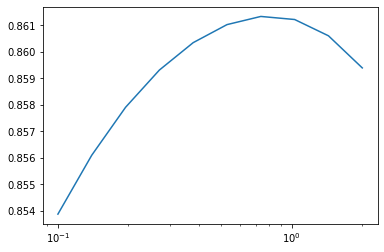

In [44]:
plt.semilogx(alphas, scores)

So, looking at this graph we can say that at this `alpha` = `0.7368062997280774` we get our optimal value in regards to the hyperparameter that will generalize well to new data coming in.

Now that we've found the hyperparameter, we can train it on all data 

In [45]:
best_estimator = Pipeline([
        ("make_higher_degree", PolynomialFeatures(degree=2)), # increases model complexity
        ("scaler", SS), # scaling
        ("ridge_regression", Ridge(alpha=0.7368062997280774, max_iter=100000)),  # applying regularization
    ])

best_estimator.fit(X, y)
print(best_estimator.score(X, y))

0.9137010430449919


> Both Lasso and Ridge with proper hyperparameter tuning give better results than plain Linear Regression!

## Grid Search CV 🏁

`GridSearchCV` is a function that we can import from `sklearn.model_selection` that does all these steps for us.

GridSearchCV takes a `model` (or `pipeline`) and a dictionary of parameters to scan over. It finds the hyperparameter set that has the best out-of-sample score on all the parameters, and calls that it's "best estimator". It then retrains on all data with the "best" hyper-parameters.

### Tuning hyperparameters for Lasso Regression ➰
We'll be doing all of this that we did in just one step using Grid Search CV.

In [46]:
from sklearn.model_selection import GridSearchCV

# Same estimator as before
estimator = Pipeline([
        ("polynomial_features",  PolynomialFeatures()), # increases model complexity
        ("scaler", StandardScaler()), # scaling
        ("lasso_regression", Lasso()),  # applying regularization
    ])

params = {
    'polynomial_features__degree': [1, 2, 3], # tune degree for polynomial features
    'lasso_regression__alpha': np.geomspace(1e-9, 1e0, num=10) # tune alpha value for lasso
}

grid = GridSearchCV(estimator, params, cv=kf)

In [47]:
grid.fit(X, y)

GridSearchCV(cv=KFold(n_splits=3, random_state=72018, shuffle=True),
             estimator=Pipeline(steps=[('polynomial_features',
                                        PolynomialFeatures()),
                                       ('scaler', StandardScaler()),
                                       ('lasso_regression', Lasso())]),
             param_grid={'lasso_regression__alpha': array([1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02,
       1.e-01, 1.e+00]),
                         'polynomial_features__degree': [1, 2, 3]})

In [48]:
print(grid.best_score_, grid.best_params_)

0.8589963567948978 {'lasso_regression__alpha': 0.01, 'polynomial_features__degree': 2}


The best score we're getting is `0.85` for the `degree` of `2` and an `alpha` value of `0.01`.

We can then actually use that `grid` in order to predict the x-values, which is something we were not able to do that with `cross_val_predicts`, the reason that with grid search, it's going to test against all of the different holdout sets, and then once it's tested against all of the different holdout sets and it finds the best hyper-parameters that will fit for generalization for data-sets that we've never seen. It's then going to use those hyper-parameters to learn the parameters on the entire data-set because the more data that you have, the better you're going to be able to predict, and the idea is that you are now able to use this to predict as new data comes in.

In [49]:
y_predict = grid.predict(X)
print(r2_score(y, y_predict))

0.9047578542960124


**Similarly, we can tune for Ridge Regression too.**

## Random Search CV 🏁

The only thing that is different here is it moves within the grid in a random fashion to find the best set of hyperparameters. This approach reduces unnecessary computation.

### Tuning hyperparameters for Ridge Regression ⛰️

In [50]:
from sklearn.model_selection import RandomizedSearchCV

# Same estimator as before
estimator = Pipeline([
        ("polynomial_features",  PolynomialFeatures()), # increases model complexity
        ("scaler", StandardScaler()), # scaling
        ("ridge_regression", Ridge()),  # applying regularization
    ])

params = {
    'polynomial_features__degree': [1, 2, 3], # tune degree for polynomial features
    'ridge_regression__alpha': np.geomspace(0.1, 2, 10) # tune alpha value for ridge
}

rand = RandomizedSearchCV(estimator, params, cv=kf)

In [51]:
rand.fit(X, y)

RandomizedSearchCV(cv=KFold(n_splits=3, random_state=72018, shuffle=True),
                   estimator=Pipeline(steps=[('polynomial_features',
                                              PolynomialFeatures()),
                                             ('scaler', StandardScaler()),
                                             ('ridge_regression', Ridge())]),
                   param_distributions={'polynomial_features__degree': [1, 2,
                                                                        3],
                                        'ridge_regression__alpha': array([0.1       , 0.13949508, 0.19458877, 0.27144176, 0.3786479 ,
       0.52819519, 0.7368063 , 1.02780853, 1.43374233, 2.        ])})

In [52]:
print(rand.best_score_, rand.best_params_)

0.8614921774272938 {'ridge_regression__alpha': 0.7368062997280774, 'polynomial_features__degree': 2}


The best score we're getting is `0.86` for the `degree` of `2` and an `alpha` value of `0.7368062997280774`.

In [53]:
y_predict = rand.predict(X)
print(r2_score(y, y_predict))

0.9137010430449919


**Similarly, we can tune for Lasso Regression too.**

There is also
- a `LassoCV` function that uses an L1 regularization function and cross-validation. L1 regularization will selectively shrink some coefficients, effectively performing feature elimination.
- a `RidgeCV` function that uses an L2 regularization function and cross-validation. L2 regularization reduces the magnitude of the coefficients.
- an `ElasticNetCV`, which is a combination of L2 and L1 regularization, with cross-validation. **ElasticNet** is similar to what we saw with the **Ridge**, and with **Lasso**, just with an extra hyperparameter of the `l1_ratio`.